In [1]:
'''Finding the Data
Your data should be a binary classification dataset. The target variable needs to be two classes. You 
should have at least 4 input variables. You are not limited on the source of the data but some 
recommendations would be from Kaggle or UCI Machine Learning Repository. 
2. Visualizing and Summarizing Data
Once you have collected your data, you need to understand the data. For each variable, you should 
know the data type and the summary statistics. You should also create visualizations which can include 
histograms and/or bar charts.
3. Cleaning and Transforming Data
When you have a good idea of the shape of your data, you need to transform and clean it for modeling. 
For missing observations, you may fill them in or delete the entire record. For outliers, you may 
transform the variable or delete the problem outliers. You may need to rescale your data depending on 
the model you are using.
4. Creating the Classification Model
Your data is now analytics ready. Choose from either a kNN, Logistic Regression, or Decision Tree model 
to create your classifier.
5. Validating the Model
In the validation step, you will tune the model to try and increase the validation measures: accuracy, 
precision, recall, and F1. Be sure to know which validation measure is most appropriate for you model 
and discuss it.
You will turn in the following:
1. The dataset you used as .csv
2. Python Code for ALL steps of the process as a .py or .ipynb file'''

'Finding the Data\nYour data should be a binary classification dataset. The target variable needs to be two classes. You \nshould have at least 4 input variables. You are not limited on the source of the data but some \nrecommendations would be from Kaggle or UCI Machine Learning Repository. \n2. Visualizing and Summarizing Data\nOnce you have collected your data, you need to understand the data. For each variable, you should \nknow the data type and the summary statistics. You should also create visualizations which can include \nhistograms and/or bar charts.\n3. Cleaning and Transforming Data\nWhen you have a good idea of the shape of your data, you need to transform and clean it for modeling. \nFor missing observations, you may fill them in or delete the entire record. For outliers, you may \ntransform the variable or delete the problem outliers. You may need to rescale your data depending on \nthe model you are using.\n4. Creating the Classification Model\nYour data is now analytic

In [2]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import random

In [3]:
def confusion(threshold):
    y_pred = round(model.predict(X_test)-threshold+0.5)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    precision = (tp)/(tp+fp)
    recall = (tp)/(tp+fn)
    f1 = 2* precision*recall/(precision+recall)
    return (print(confusion_matrix(y_test, y_pred),'\nAccuracy:',accuracy,
                  '\nPrecision:',precision,'\nRecall:',recall,'\nF1:',f1))

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.head(5)
#There is a chestpaintype you do not see here called TA

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [8]:
df['ATA']=pd.get_dummies(df['ChestPainType'])['ATA']
df['NAP']=pd.get_dummies(df['ChestPainType'])['NAP']
df['ASY']=pd.get_dummies(df['ChestPainType'])['ASY']
df['F']=pd.get_dummies(df['Sex'])['F']
df['Normal']=pd.get_dummies(df['RestingECG'])['Normal']
df['Y']=pd.get_dummies(df['ExerciseAngina'])['Y']
df['Up']=pd.get_dummies(df['ST_Slope'])['Up']

In [9]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ATA,NAP,ASY,F,Normal,Y,Up
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,0,0,0,1,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,1,0,1,1,0,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,0,0,0,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,1,1,1,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1,0,0,1,0,1


In [10]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
ATA                 uint8
NAP                 uint8
ASY                 uint8
F                   uint8
Normal              uint8
Y                   uint8
Up                  uint8
dtype: object

In [11]:
df.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [12]:
df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [13]:
df.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [16]:
df.FastingBS.value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [17]:
df.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [19]:
df.ExerciseAngina.value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [21]:
df.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [ ]:
#Create histograms for continuous variables just to check skewness or outliers in our data sets.

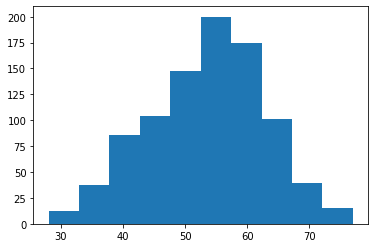

In [56]:
plt.hist(df.Age)
plt.show()

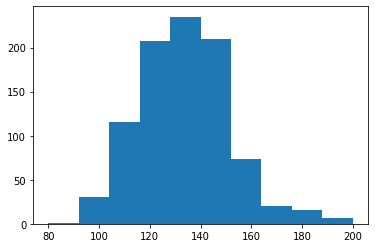

In [57]:
plt.hist(df.RestingBP)
plt.show()

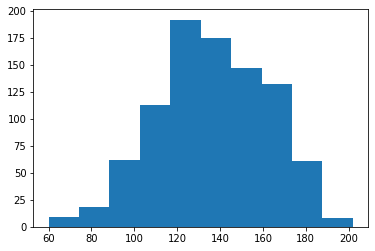

In [58]:
plt.hist(df.MaxHR)
plt.show()

In [22]:
#Lets create two histograms one for Resting BP and Cholesterol. These two categories have a min of 0 which doesn't make sense 

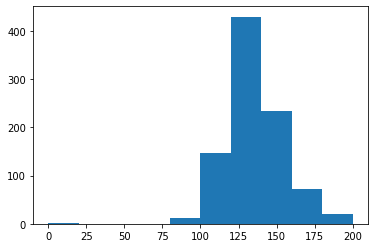

In [23]:
#RestingBP
plt.hist(df.RestingBP)
plt.show()

In [24]:
df[df['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ATA,NAP,ASY,F,Normal,Y,Up
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1,0,1,0,0,1,0,0


In [25]:
df = df.drop(df.index[449])

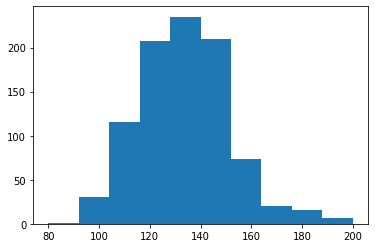

In [26]:
plt.hist(df.RestingBP)
plt.show()

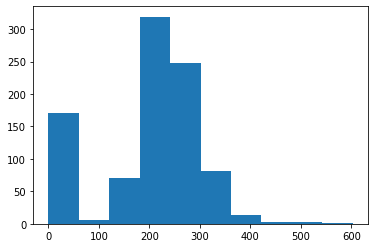

In [27]:
#Cholesterol 
plt.hist(df.Cholesterol)
plt.show()

In [28]:
#Everything seems to be pretty normal except for the zero cholesterol so lets replace it with the median

In [29]:
df['Cholesterol']=df['Cholesterol'].replace(0,df['Cholesterol'].median())

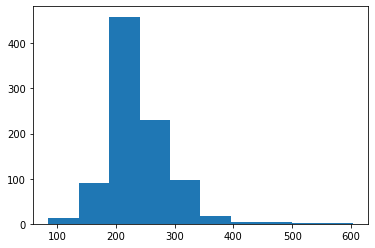

In [30]:
plt.hist(df.Cholesterol)
plt.show()

In [31]:
#This histogram looks more normal to me!

In [32]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ATA,NAP,ASY,F,Normal,Y,Up
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,0,0,0,1,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,1,0,1,1,0,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,0,0,0,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,1,1,1,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1,0,0,1,0,1


In [33]:
#Checking for the VIF's, taking all independent vars and the constant and setting it to X
X = df[['Age', 'ATA','NAP', 'ASY','F', 'RestingBP', 'Cholesterol', 'FastingBS', 'Normal', 'MaxHR', 'Y'
       , 'Oldpeak', 'Up']]
X = sm.add_constant(X)
y = df[['HeartDisease']]

In [34]:
#Checking the VIF of the variables 
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

        feature         VIF
0         const  199.353489
1           Age    1.387394
2           ATA    4.096137
3           NAP    4.296674
4           ASY    5.852606
5             F    1.101268
6     RestingBP    1.110475
7   Cholesterol    1.044378
8     FastingBS    1.081988
9        Normal    1.078935
10        MaxHR    1.480248
11            Y    1.576534
12      Oldpeak    1.430746
13           Up    1.608865


In [35]:
#ASY has a VIF greater than 5 So lets drop it!
X = df[['Age', 'ATA','NAP', 'F', 'RestingBP', 'Cholesterol', 'FastingBS', 'Normal', 'MaxHR', 'Y'
       , 'Oldpeak', 'Up']]
X = sm.add_constant(X)
y = df[['HeartDisease']]

In [36]:
#Checking the VIF of the variables 
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

        feature         VIF
0         const  168.898679
1           Age    1.384712
2           ATA    1.417378
3           NAP    1.203504
4             F    1.101251
5     RestingBP    1.105981
6   Cholesterol    1.041405
7     FastingBS    1.081958
8        Normal    1.077965
9         MaxHR    1.455100
10            Y    1.520294
11      Oldpeak    1.429988
12           Up    1.608506


In [37]:
#The VIF's look great so lets keep moving!

In [38]:
#Time to generate a random seed
np.random.seed(19)

In [39]:
#Lets split up the data for a 70% training set and 30% Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [40]:
#
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.333215
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                  641
Model:                          Logit   Df Residuals:                      628
Method:                           MLE   Df Model:                           12
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                  0.5169
Time:                        14:16:15   Log-Likelihood:                -213.59
converged:                       True   LL-Null:                       -442.11
Covariance Type:            nonrobust   LLR p-value:                 3.011e-90
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2989      1.582      0.821      0.412      -1.802       4.400
Age             0.0071    

In [41]:
confusion(.5)

[[ 93  23]
 [ 19 141]] 
Accuracy: 0.8478260869565217 
Precision: 0.8597560975609756 
Recall: 0.88125 
F1: 0.8703703703703702


In [42]:
#Lets recreate the the model but first dropping the least significant variables 
X_train=X_train.drop(['Normal'], axis=1)
X_test=X_test.drop(['Normal'], axis=1)

In [43]:
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.333217
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                  641
Model:                          Logit   Df Residuals:                      629
Method:                           MLE   Df Model:                           11
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                  0.5169
Time:                        14:16:15   Log-Likelihood:                -213.59
converged:                       True   LL-Null:                       -442.11
Covariance Type:            nonrobust   LLR p-value:                 4.563e-91
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2760      1.533      0.832      0.405      -1.730       4.282
Age             0.0073    

In [44]:
confusion(.5)

[[ 93  23]
 [ 19 141]] 
Accuracy: 0.8478260869565217 
Precision: 0.8597560975609756 
Recall: 0.88125 
F1: 0.8703703703703702


In [45]:
#Rerun model drop next least significant Variable
X_train=X_train.drop(['Cholesterol'], axis=1)
X_test=X_test.drop(['Cholesterol'], axis=1)
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.333382
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                  641
Model:                          Logit   Df Residuals:                      630
Method:                           MLE   Df Model:                           10
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                  0.5166
Time:                        14:16:15   Log-Likelihood:                -213.70
converged:                       True   LL-Null:                       -442.11
Covariance Type:            nonrobust   LLR p-value:                 7.289e-92
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4949      1.460      1.024      0.306      -1.367       4.356
Age            0.0068      0.

In [46]:
confusion(.5)

[[ 92  24]
 [ 20 140]] 
Accuracy: 0.8405797101449275 
Precision: 0.8536585365853658 
Recall: 0.875 
F1: 0.8641975308641976


In [47]:
#Rerun model drop next least significant Variable
X_train=X_train.drop(['Age'], axis=1)
X_test=X_test.drop(['Age'], axis=1)
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.333543
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                  641
Model:                          Logit   Df Residuals:                      631
Method:                           MLE   Df Model:                            9
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                  0.5164
Time:                        14:16:15   Log-Likelihood:                -213.80
converged:                       True   LL-Null:                       -442.11
Covariance Type:            nonrobust   LLR p-value:                 1.099e-92
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8626      1.216      1.532      0.126      -0.520       4.246
ATA           -1.8817      0.

In [48]:
confusion(.5)

[[ 92  24]
 [ 20 140]] 
Accuracy: 0.8405797101449275 
Precision: 0.8536585365853658 
Recall: 0.875 
F1: 0.8641975308641976


In [49]:
#Rerun model drop next least significant Variable
X_train=X_train.drop(['RestingBP'], axis=1)
X_test=X_test.drop(['RestingBP'], axis=1)
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.334012
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                  641
Model:                          Logit   Df Residuals:                      632
Method:                           MLE   Df Model:                            8
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                  0.5157
Time:                        14:16:15   Log-Likelihood:                -214.10
converged:                       True   LL-Null:                       -442.11
Covariance Type:            nonrobust   LLR p-value:                 1.893e-93
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5760      0.796      3.235      0.001       1.015       4.137
ATA           -1.8733      0.

In [55]:
confusion(.1)

[[ 55  61]
 [  3 157]] 
Accuracy: 0.7681159420289855 
Precision: 0.7201834862385321 
Recall: 0.98125 
F1: 0.8306878306878307


In [51]:
#lets predict Jims odds
jim = [1, 1, 1, 0, 1, 172, 1, 0, 1]
model.predict(jim)

array([0.07001338])